# Multivariate Standard Cauchy Distribution $f_{\nu}(x) = (1 + ||x||^2)^{-(d+1)/2}$

In [1]:
import slice_sampling as ss
import plotting_functions as pfs
import numpy as np
import numpy.linalg as alg
import numpy.random as rnd

In [2]:
# Set experiment parameters
d = 100 # dimension, should be > 1
itnum = int(5e4) # number of chain iterations
path_prefix = "../plots/std_Cauchy_"

In [3]:
log_density = lambda x: -(d+1)/2 * np.log(1 + alg.norm(x)**2)

In [4]:
# Set sampler parameters
x_0 = np.ones(d)
w = d

In [5]:
samples_iid = rnd.chisquare(df=1, size=(itnum+1,1))**(-1/2) * rnd.normal(size=(itnum+1,d))

In [6]:
samples_gpss = ss.gibbsian_polar_ss(log_density, x_0, w, itnum)

In [7]:
samples_ess = ss.naive_elliptical_ss(log_density, x_0, itnum)

In [8]:
samples_hruss = ss.hit_and_run_uniform_ss(log_density, x_0, w, itnum)

In [9]:
snames = ["Exact Sampling", "Gibbsian Polar S.S.", "Hit-and-Run Uniform S.S.", "Elliptical S.S."]
nsam = len(snames)
samples = [samples_iid, samples_gpss, samples_hruss, samples_ess]
radii = [alg.norm(sams, axis=1) for sams in samples]
log_radii = [np.log(rs) for rs in radii]
win = int(1e4)
mar_sams = [sams[:win,0] for sams in samples]
log_abs_mar_sams = [np.log(np.abs(mss)) for mss in mar_sams]

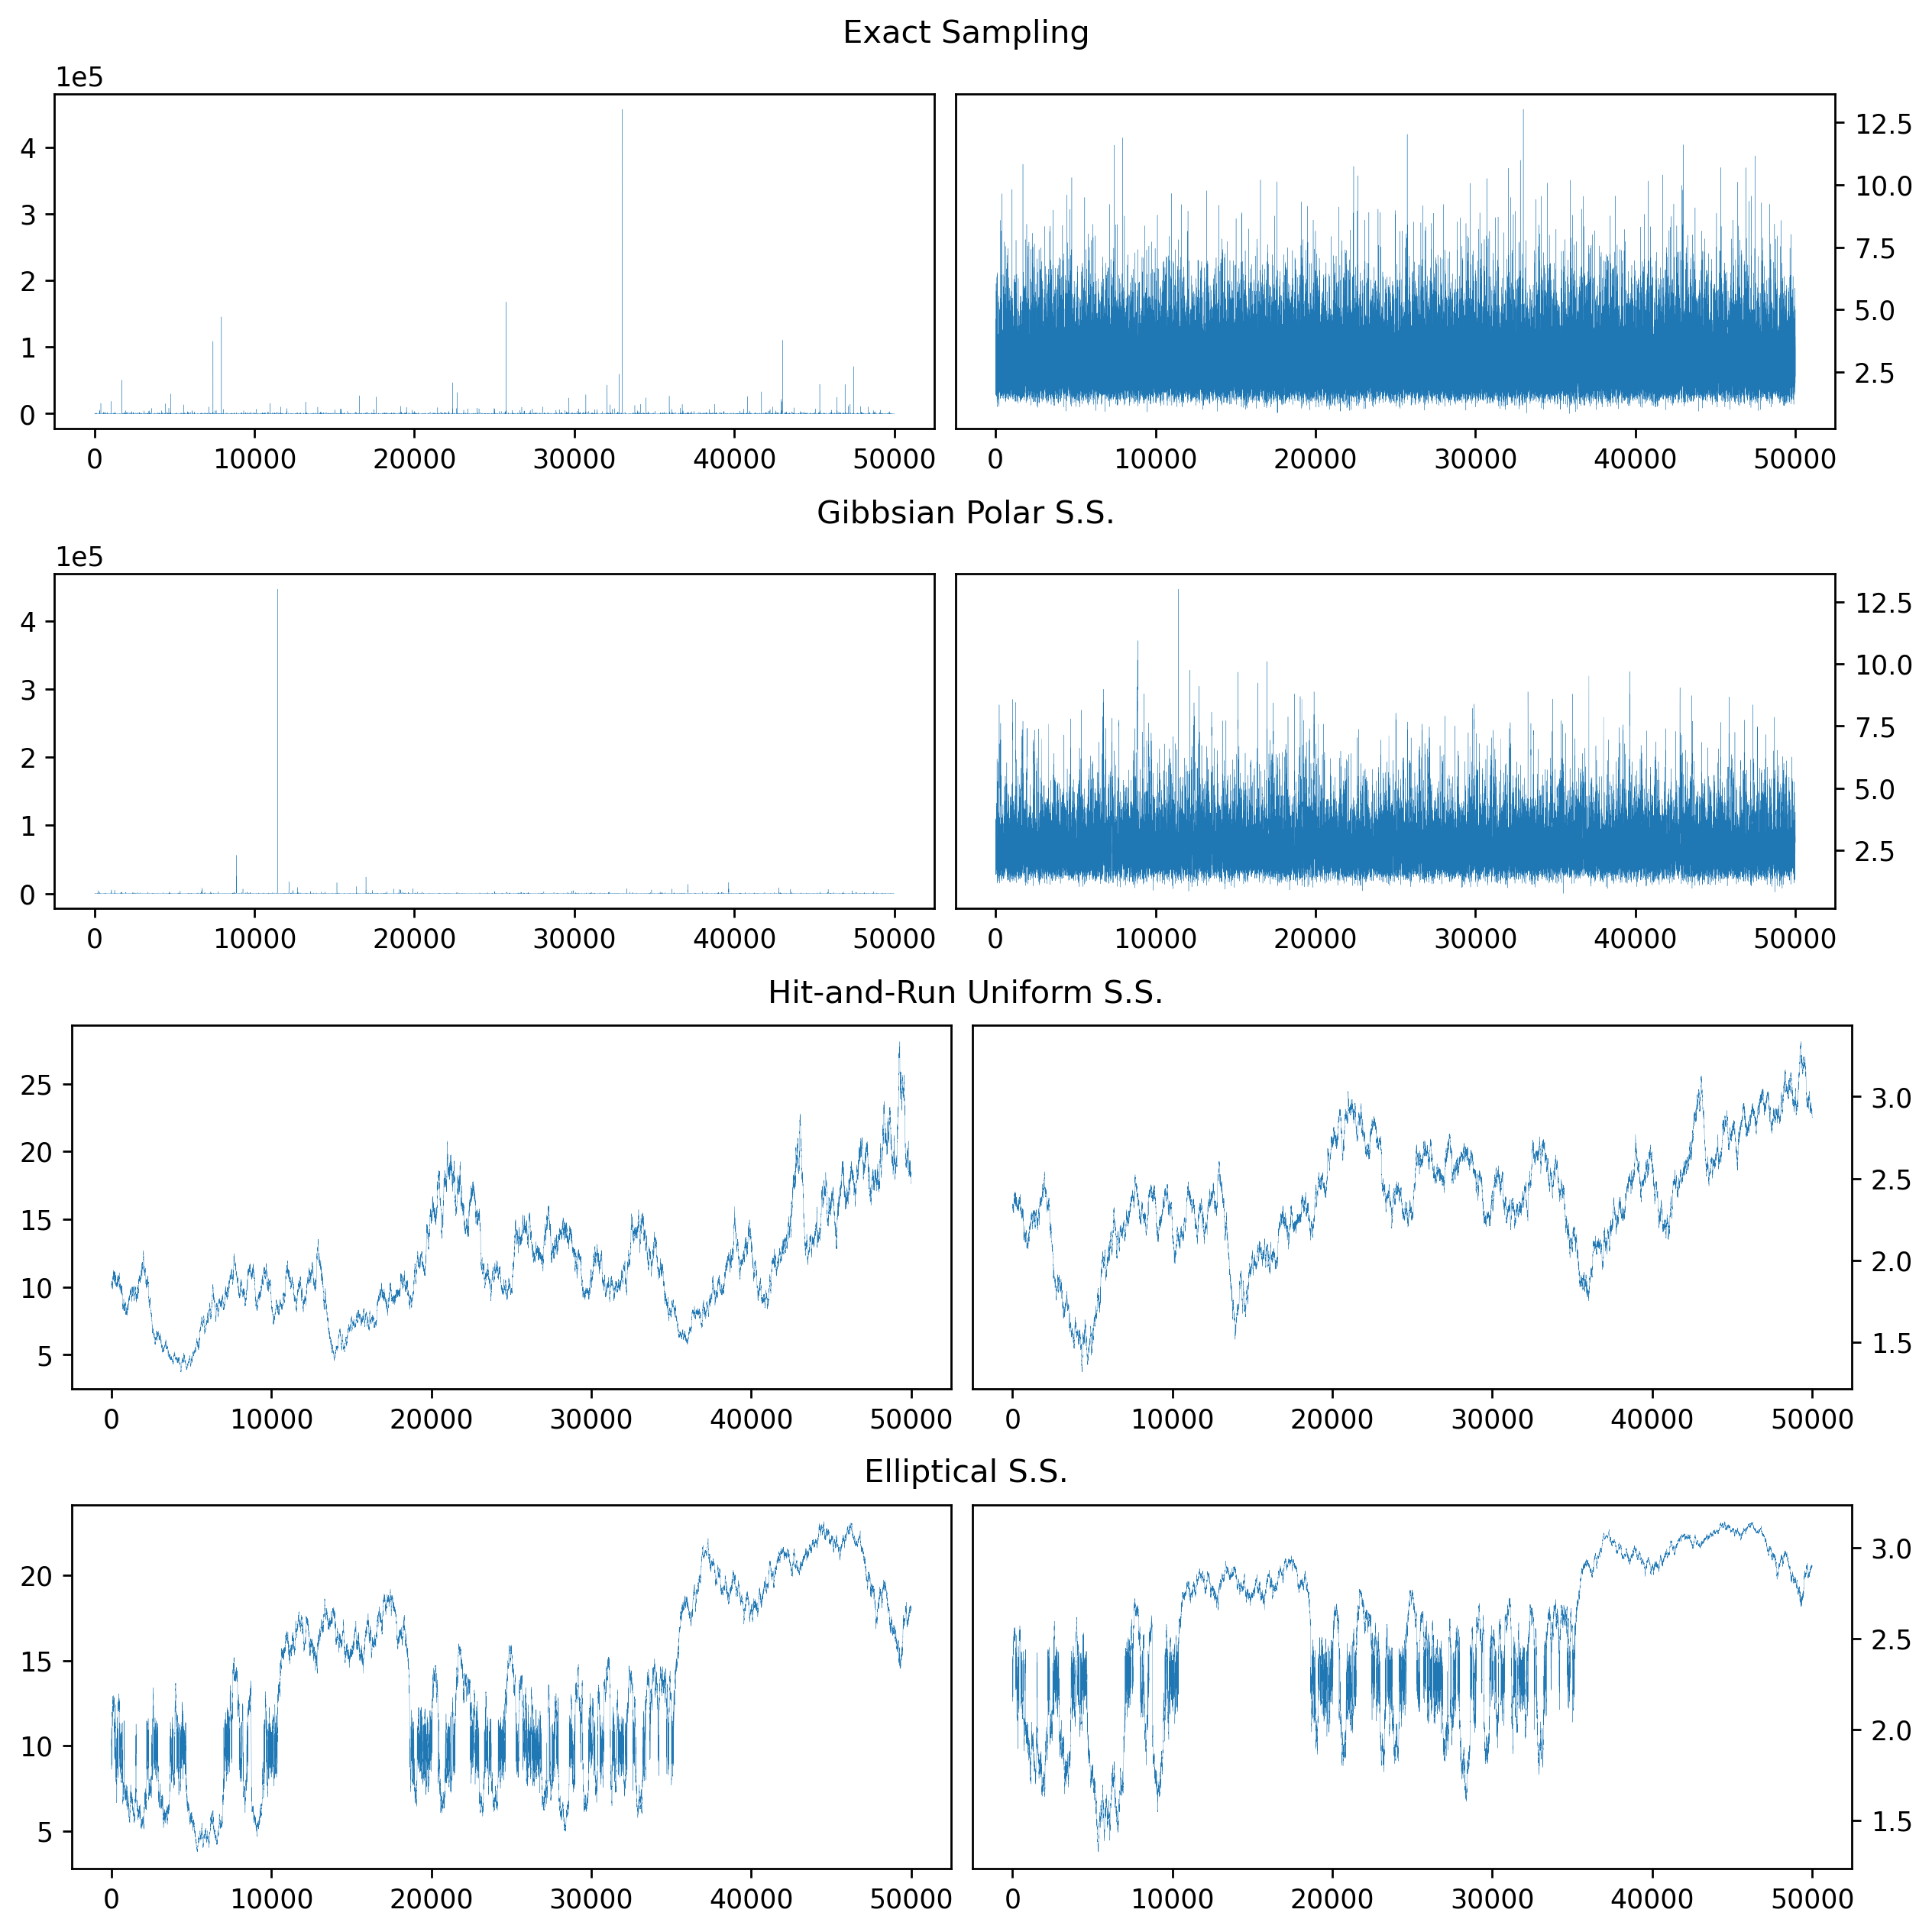

In [10]:
pfs.plot_traces_2_col(radii, log_radii, snames, dpi=250, lw1=0.1, lw2=0.1, filepath = path_prefix + "radii.png")